# 0. Introduction
Welcome to the Risk-Parity Portfolio Analysis project! In this project, you'll explore the concept of risk-parity, a popular portfolio management strategy that aims to allocate investments in a way that equalizes the risk contribution of each asset. This approach is widely used by hedge funds and institutional investors to create more balanced portfolios that are less sensitive to market volatility.

Throughout this project, you'll learn how to download financial data for various assets, calculate returns, and compute risk-parity weights using Python. By the end, you'll evaluate the performance of your risk-parity portfolio through key financial metrics such as annualized return, volatility, and Sharpe ratio. This hands-on experience will deepen your understanding of portfolio management and give you practical skills in financial data analysis. Whether you're new to finance or looking to enhance your quantitative finance skills, this project provides a solid foundation in risk-parity strategies and their application in real-world scenarios.

## Getting Started: Tips and Instructions

1. **Familiarize Yourself with the Notebook Structure:**
   - The notebook is organized into clearly defined sections, each focusing on a specific aspect of the risk-parity portfolio analysis. Take a moment to glance through the sections to understand the overall workflow.

2. **Review the Data:**
   - Since the data is already available, start by exploring the initial few cells to understand the data structure and what each column represents. This will give you context for the calculations and analysis you'll be performing.

3. **Run Cells Sequentially:**
   - Work through the notebook by executing each code cell in order. This will help you build your analysis step by step and ensure that each part of the project is functioning as expected.

4. **Experiment with Parameters:**
   - Feel free to tweak parameters such as the rolling window size for calculating risk-parity weights or adjust the assets included in the portfolio. Experimenting will help deepen your understanding of how these factors influence portfolio performance.

5. **Leverage the Plots:**
   - Use the generated plots to visually assess the impact of your calculations. The visualizations are crucial for understanding the risk-parity approach and how different assets contribute to the portfolio.

6. **Reflect:**
   - As you work through the notebook, consider why each step is necessary and how it contributes to the overall goal of building a risk-parity portfolio. If something isn’t clear, take a moment to reflect or explore additional resources.

Enjoy the process of exploring risk-parity strategies, and don't hesitate to dive deeper into the data or code to enhance your learning experience!

# 1. Import Libraries

In [1]:
# Load necessary libraries
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

# 2. Download Financial Data
We will download front-month futures data for S&P500, 10-year Treasuries, gold, and US dollar using the `yfinance` library.

## 2.1 Portfolio Composition

For this project, the portfolio includes a mix of indices following stocks, bonds and commodities.

- **VTI**: Vanguard Total Stock Market Index Fund ETF
- **AGG**: iShares Core US Aggregate Bond ETF
- **GLD**: SPDR Gold Trust
- **BTC-USD**: Tracks Bitcoin cryptocurrency

In [2]:
# Download front-month futures data
# symbols = ['ES=F', 'ZN=F', 'GC=F', 'DX=F']
symbols = symbols = ['VTI', 'AGG', 'GLD' ,'BTC-USD']
data = yf.download(symbols, auto_adjust=False)

[*********************100%***********************]  4 of 4 completed


In [3]:
data.head()

Price      Adj Close                        Close                        High  \
Ticker           AGG BTC-USD GLD        VTI   AGG BTC-USD GLD        VTI  AGG   
Date                                                                            
2001-06-15       NaN     NaN NaN  36.339684   NaN     NaN NaN  55.665001  NaN   
2001-06-18       NaN     NaN NaN  36.107914   NaN     NaN NaN  55.310001  NaN   
2001-06-19       NaN     NaN NaN  36.209122   NaN     NaN NaN  55.465000  NaN   
2001-06-20       NaN     NaN NaN  36.591026   NaN     NaN NaN  56.049999  NaN   
2001-06-21       NaN     NaN NaN  36.884804   NaN     NaN NaN  56.500000  NaN   

Price               ... Low            Open                        Volume  \
Ticker     BTC-USD  ... GLD        VTI  AGG BTC-USD GLD        VTI    AGG   
Date                ...                                                     
2001-06-15     NaN  ... NaN  55.174999  NaN     NaN NaN  55.424999    NaN   
2001-06-18     NaN  ... NaN  55.310001  NaN     NaN NaN  55.814999    NaN   
2001-06-19     NaN  ... NaN  55.235001  NaN     NaN NaN  56.150002    NaN   
2001-06-20     NaN  ... NaN  55.375000  NaN     NaN NaN  55.375000    NaN   
2001-06-21     NaN  ... NaN  55.875000  NaN     NaN NaN  56.000000    NaN   

Price                              
Ticker     BTC-USD GLD        VTI  
Date                               
2001-06-15     NaN NaN  1067400.0  
2001-06-18     NaN NaN   282600.0  
2001-06-19     NaN NaN  1777600.0  
2001-06-20     NaN NaN   476000.0  
2001-06-21     NaN NaN   240400.0  

[5 rows x 24 columns]

### 3. Resample Data

In this section, we aim to reduce the noise in the daily financial data by resampling it to a monthly frequency. Resampling is a common technique in time series analysis, allowing us to aggregate data points over a specified time period. This helps in smoothing out short-term fluctuations and making the data more manageable for analysis.


In [4]:
# Resample data to monthly frequency
data = data.resample("M").last()
# Convert index to datetime
data.index = pd.to_datetime(data.index)

In [5]:
print(type(data.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [6]:
data.head()

Price      Adj Close                        Close                        High  \
Ticker           AGG BTC-USD GLD        VTI   AGG BTC-USD GLD        VTI  AGG   
Date                                                                            
2001-06-30       NaN     NaN NaN  36.977013   NaN     NaN NaN  56.500000  NaN   
2001-07-31       NaN     NaN NaN  36.270199   NaN     NaN NaN  55.419998  NaN   
2001-08-31       NaN     NaN NaN  34.146469   NaN     NaN NaN  52.174999  NaN   
2001-09-30       NaN     NaN NaN  31.181427   NaN     NaN NaN  47.474998  NaN   
2001-10-31       NaN     NaN NaN  31.821812   NaN     NaN NaN  48.450001  NaN   

Price               ... Low            Open                        Volume  \
Ticker     BTC-USD  ... GLD        VTI  AGG BTC-USD GLD        VTI    AGG   
Date                ...                                                     
2001-06-30     NaN  ... NaN  55.955002  NaN     NaN NaN  56.025002    NaN   
2001-07-31     NaN  ... NaN  55.205002  NaN     NaN NaN  55.250000    NaN   
2001-08-31     NaN  ... NaN  51.915001  NaN     NaN NaN  52.075001    NaN   
2001-09-30     NaN  ... NaN  46.674999  NaN     NaN NaN  46.674999    NaN   
2001-10-31     NaN  ... NaN  48.450001  NaN     NaN NaN  48.674999    NaN   

Price                             
Ticker     BTC-USD GLD       VTI  
Date                              
2001-06-30     NaN NaN  215000.0  
2001-07-31     NaN NaN  119200.0  
2001-08-31     NaN NaN   69800.0  
2001-09-30     NaN NaN  365800.0  
2001-10-31     NaN NaN  227400.0  

[5 rows x 24 columns]

### 4. Clean and Prepare Data

In this step, we will focus on extracting the relevant data, handling missing values, and ensuring the data is ready for analysis. Specifically, we'll subset the adjusted close prices from our dataset, fill any missing values, and drop rows with unknown prices.

#### Steps to Clean and Prepare Data

1. **Subset Adjusted Close Prices**     
2. **Fill Missing Values (NaNs)**
3. **Drop Rows with Remaining NaNs**
4. **Ensure Correct Date Formatting**

By following these steps, we will have a clean dataset of adjusted close prices that is free of missing values and properly formatted for time series analysis.


In [7]:
# Subset adjusted close prices and fill NaNs
prices = (data["Adj Close"]
          .ffill()
          .dropna()
         )
# Convert index to datetime
prices.index = pd.to_datetime(prices.index)

In [8]:
print(prices)

Ticker            AGG        BTC-USD         GLD         VTI
Date                                                        
2014-09-30  82.628273     386.944000  116.209999   84.483780
2014-10-31  83.507500     338.321014  112.660004   86.803680
2014-11-30  84.056183     378.046997  112.110001   88.956642
2014-12-31  84.180229     320.192993  113.580002   88.922562
2015-01-31  85.907928     217.464005  123.449997   86.489761
...               ...            ...         ...         ...
2025-01-31  96.149971  102405.023438  258.559998  297.553925
2025-02-28  98.301216   84373.007812  263.269989  291.933655
2025-03-31  98.275375   82548.914062  288.140015  274.839996
2025-04-30  98.698997   94207.312500  303.769989  272.820007
2025-05-31  97.660004  105166.859375  294.239990  292.579987

[129 rows x 4 columns]


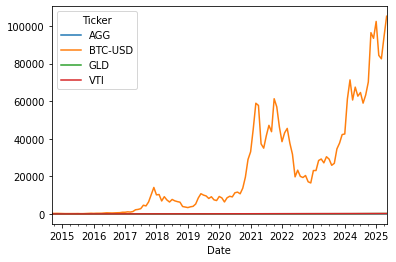

In [9]:
prices.plot()
plt.show()

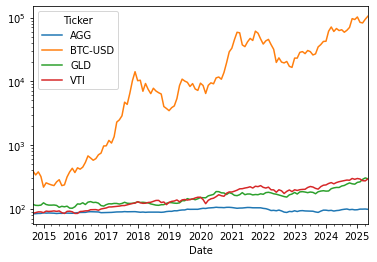

In [10]:
prices.plot()
plt.yscale("log")
plt.show()

**Observations:**

- The meteoric rise in BTC-USD shadows other assets in the portfolio. However, this comes with increased volatility as observed in later sections.

### 5. Calculate Returns

In financial analysis, one of the key metrics is the return on an investment, which shows how much the price of an asset has increased or decreased over a certain period. We will calculate the **arithmetic returns** of the adjusted close prices to measure this change over time.

#### Steps to Calculate Arithmetic Returns

1. **Understanding Arithmetic Returns:**
   - Arithmetic returns measure the percentage change in the price of an asset from one period to the next. 
   - The formula for calculating the arithmetic return for a given period is:

     $
     R_t = \frac{P_t - P_{t-1}}{P_{t-1}}
     $
     
     where:
     - $ R_t $ is the return at time $ t $,
     - $ P_t $ is the price at time $ t $,
     - $ P_{t-1} $ is the price at the previous time period.

   - This formula can be simplified to:
     $
     R_t = \frac{P_t}{P_{t-1}} - 1
     $
   - However, in practice, it is common to use the percentage change function provided by Pandas, which handles this calculation efficiently.

2. **Calculate Percentage Change**
3. **Handle Missing Values:**

By following these steps, we will have a series of arithmetic returns that represent the day-to-day percentage changes in the asset's price, which can be used for further analysis such as calculating cumulative returns, volatility, or risk metrics.


In [11]:
# Compute arithmetic returns
returns = (prices
           .pct_change()
           .dropna()
          )

In [12]:
print(returns)

Ticker           AGG   BTC-USD       GLD       VTI
Date                                              
2014-10-31  0.010641 -0.125659 -0.030548  0.027460
2014-11-30  0.006570  0.117421 -0.004882  0.024803
2014-12-31  0.001476 -0.153034  0.013112 -0.000383
2015-01-31  0.020524 -0.320835  0.086899 -0.027359
2015-02-28 -0.008948  0.169219 -0.059052  0.057420
...              ...       ...       ...       ...
2025-01-31  0.005160  0.096071  0.067856  0.030330
2025-02-28  0.022374 -0.176085  0.018216 -0.018888
2025-03-31 -0.000263 -0.021619  0.094466 -0.058553
2025-04-30  0.004311  0.141230  0.054244 -0.007350
2025-05-31 -0.010527  0.116334 -0.031372  0.072429

[128 rows x 4 columns]


### Asset Volatility

Initial look at individual volatility of portfolio's underlying assets.

In [13]:
rolling_vol = returns.rolling(window=36).std()
rolling_vol.describe()

Ticker,AGG,BTC-USD,GLD,VTI
count,93.000000,93.000000,93.000000,93.000000
mean,0.013428,0.227279,0.039537,0.046779
std,0.005253,0.030117,0.004534,0.010727
min,0.008001,0.168420,0.029525,0.026934
25%,0.009203,0.214619,0.037939,0.035645
50%,0.010380,0.227160,0.041133,0.051449
75%,0.018245,0.246987,0.043081,0.054991
max,0.022922,0.283933,0.046523,0.063369


**Observations**:

- AGG has the least mean and max volatility and is expected to provide more stability during drawdowns
- BTC-USD has the highest mean and max volatility and is clearly the highest risk on asset in the portfolio
- Surprisingly, GLD has lower mean and max volatility than VTI the total stock market index tracker.

### 6. Compute Risk-Parity Weights

Risk-parity is an investment strategy that seeks to allocate portfolio weights in a way that each asset contributes equally to the overall portfolio risk. This method is especially useful in diversifying risk across different assets with varying levels of volatility.

#### Steps to Compute Risk-Parity Weights

1. **Understanding Risk-Parity:**
   - The idea behind risk-parity is to allocate more weight to less volatile assets and less weight to more volatile assets, thereby equalizing the risk contribution of each asset in the portfolio.
   - The weight of each asset in the portfolio is inversely proportional to its volatility.

2. **Calculate Rolling Volatility:**
   - Volatility is a statistical measure of the dispersion of returns for a given security or market index.
     
3. **Compute Inverse Volatility:**
4. **Normalize Weights:**
   - Once we have the inverse volatilities, we normalize them so that the sum of the weights for each time period equals 1. This ensures that we have a proper weight distribution across assets.
   - We achieve this by dividing the inverse volatility of each asset by the sum of the inverse volatilities across all assets for each time period.
     
5. **Shift Weights for Practical Application:**
   - In a real-world scenario, we can only make investment decisions based on information that is available at the time of making the decision. Therefore, we shift the computed weights by one period to ensure that the weights at time $ t $ are based on data up to $ t-1 $.      - This shift ensures that the weights applied are based on historical data up to the previous period, which is crucial for avoiding look-ahead bias.

By following these steps, we generate a time series of risk-parity weights that can be used to allocate assets in a way that balances the risk across the portfolio. The resulting weights adapt dynamically based on the rolling volatility, ensuring that each asset contributes equally to the overall risk over time.


In [14]:
def compute_risk_parity_weights(returns, window_size=36):
    # Compute volatility known at time t
    rolling_vol = returns.rolling(window_size).std()
    rolling_inverse_vol = 1 / rolling_vol
    # Divide inverse volatility by the sum of inverse volatilities
    risk_parity_weights = rolling_inverse_vol.apply(lambda x: x / x.sum(), axis=1)
    # Shift weights by one period to use only information available at time t
    # Avoid look ahead bias
    risk_parity_weights = risk_parity_weights.shift(1)
    risk_parity_weights.dropna(inplace=True)
    return risk_parity_weights

risk_parity_weights = compute_risk_parity_weights(returns, 36)

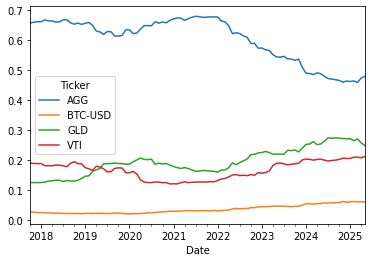

In [15]:
risk_parity_weights.plot()
plt.show()

**Observations**:

- Less volatile asset AGG bong ETF has consistently the highest weightage
- BTC-USD the Bitcoin cryptocurrency tracker has the least weightage due to hgh
- In recent years, the weightage for AGG has decreased due to volatility even in the bond market due to high inflation
- GLD has taken up more weightage in recent years but observed a dip since 2024 due to ongoing bull market rally. 

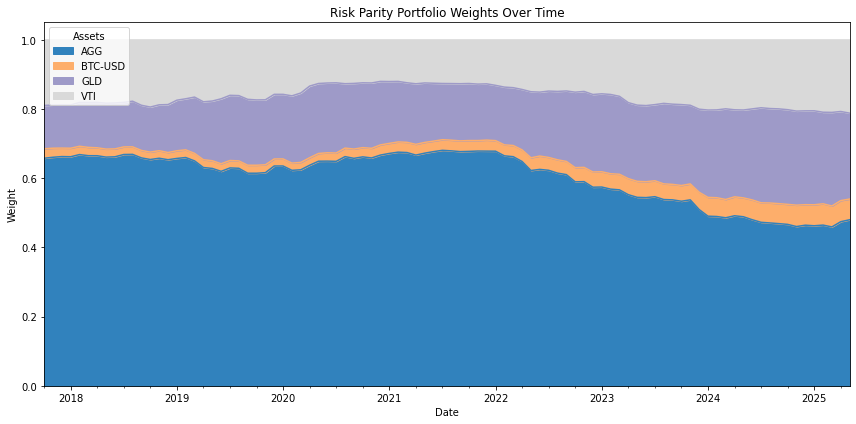

In [16]:
risk_parity_weights.plot.area(figsize=(12, 6), colormap='tab20c')

plt.title("Risk Parity Portfolio Weights Over Time")
plt.xlabel("Date")
plt.ylabel("Weight")
plt.legend(loc='upper left', title='Assets')
plt.tight_layout()
plt.show()

**Observations**:

- The area stacked chart confirms higher weightage for stable assets in particular AGG bond ETF

### 7. Calculate Weighted Returns

Once we have determined the risk-parity weights, the next step is to calculate the weighted returns for each asset and then aggregate them to obtain the portfolio returns. This process allows us to understand how the risk-parity allocation strategy would have performed over time.

#### Steps to Calculate Weighted Returns

1. **Understanding Weighted Returns:**
   - The weighted return of an asset is calculated by multiplying its individual return by the corresponding weight in the portfolio. 
   - The total portfolio return at any given time is the sum of the weighted returns of all assets.

2. **Apply Weights to Returns:**
   - We will multiply the returns of each asset by its corresponding risk-parity weight for each time period. This will give us the weighted return for each asset.
3. **Handle Missing Data:**
   - We drop any rows with missing values (`NaN`) that may result from the multiplication process. This ensures that we only consider time periods with complete data.
4. **Aggregate Weighted Returns:**
   - To calculate the portfolio's return at each time period, sum the weighted returns across all assets. This gives the overall return of the portfolio for each time period.

#### Mathematical Representation:

Given the returns $ r_{i,t} $ for asset $ i $ at time $ t $, and the risk-parity weight $ w_{i,t} $ for asset $ i $ at time $ t $, the weighted return for asset $ i $ at time $ t $ is:

$ r_{i,t}^{weighted} = r_{i,t} \times w_{i,t} $

The total portfolio return at time $ t $ is the sum of the weighted returns for all assets:

$
R_{portfolio,t} = \sum_{i=1}^{n} r_{i,t}^{weighted}
$

Where $ n $ is the number of assets in the portfolio.

By following these steps, we obtain the portfolio returns that reflect the performance of the risk-parity strategy over time. This provides insights into how well the strategy balanced risk across different market conditions.


In [17]:
# Calculate weighted returns
weighted_returns = (returns*risk_parity_weights).dropna()
risk_parity_portfolio_returns = weighted_returns.sum(axis=1)

In [18]:
print(risk_parity_portfolio_returns)

Date
2017-10-31    0.017246
2017-11-30    0.020404
2017-12-31    0.017363
2018-01-31   -0.000380
2018-02-28   -0.015768
                ...   
2025-01-31    0.032868
2025-02-28    0.000413
2025-03-31    0.011826
2025-04-30    0.023095
2025-05-31    0.009487
Freq: M, Length: 92, dtype: float64


### 8. Evaluate Portfolio Performance

To assess the performance of the risk-parity portfolio, we will compute several key financial metrics. These metrics will help us understand the portfolio's return, risk, and overall performance characteristics. Below are the details of the metrics we will calculate, along with the functions used and their corresponding arguments.

1. **Annualized Mean Return**
   - **Description:** The average return of the portfolio on an annual basis. This is useful for understanding the long-term growth rate of the portfolio.
2. **Annualized Volatility**
   - **Description:** A measure of the portfolio's return volatility on an annual basis, indicating the degree of variation in returns.
   - **Formula:** 
     $
     \text{Annualized Volatility} = \text{Standard Deviation of Monthly Returns} \times \sqrt{12}
     $
3. **Skewness**
   - **Description:** Skewness measures the asymmetry of the return distribution. Positive skewness indicates a distribution with a longer right tail, while negative skewness indicates a longer left tail.
4. **Kurtosis**
   - **Description:** Kurtosis measures the "tailedness" of the return distribution. High kurtosis indicates a distribution with heavy tails and a sharp peak.
5. **Maximum Drawdown**
   - **Description:** The maximum observed loss from a peak to a trough of the portfolio's cumulative returns, before a new peak is attained.
   - **Formula:** 
     $
     \text{Drawdown} = \frac{\text{Cumulative Return} - \text{Running Maximum}}{\text{Running Maximum}}
     $
6. **Sharpe Ratio**
   - **Description:** The Sharpe Ratio measures the risk-adjusted return of the portfolio, calculated as the ratio of the portfolio's excess return (over the risk-free rate, typically assumed to be 0 in this case) to its volatility.
   - **Formula:** 
     $
     \text{Sharpe Ratio} = \frac{\text{Annualized Mean Return}}{\text{Annualized Volatility}}
     $
7. **Sortino Ratio**
   - **Description:** The Sortino Ratio is a variation of the Sharpe Ratio that penalizes only downside volatility, thus providing a better measure of risk-adjusted return for portfolios that have asymmetric return distributions.
   - **Formula:** 
     $
     \text{Sortino Ratio} = \frac{\text{Annualized Mean Return}}{\text{Downside Volatility}}
     $
8. **Calmar Ratio**
   - **Description:** The Calmar Ratio measures the risk-adjusted return of a portfolio by comparing the annualized return to the maximum drawdown, providing insight into performance relative to the worst-case scenario.
   - **Formula:** 
     $
     \text{Calmar Ratio} = \frac{\text{Annualized Mean Return}}{-\text{Maximum Drawdown}}
     $

After calculating these metrics, we will display the results to evaluate the performance of the risk-parity portfolio comprehensively.


In [19]:
# Evaluate portfolio performance
annual_mean_return = risk_parity_portfolio_returns.mean()*12 # YOUR CODE HERE
annual_volatility = risk_parity_portfolio_returns.std()*np.sqrt(12)
skewness = risk_parity_portfolio_returns.skew()
kurtosis = risk_parity_portfolio_returns.kurt() + 3

# Compute drawdown
cumulative_returns = (1 + risk_parity_portfolio_returns).cumprod()
running_max = cumulative_returns.cummax()
drawdown = (running_max - cumulative_returns) / running_max
max_drawdown = drawdown.max()

# Compute Sharpe ratio
# TODO: Compute risk free rate and subtract it from Annual mean return
sharpe_ratio = annual_mean_return / annual_volatility

# Compute Sortino ratio
downside_std = risk_parity_portfolio_returns[risk_parity_portfolio_returns < 0].std()
downside_vol = downside_std*np.sqrt(12)
sortino_ratio = annual_mean_return / downside_vol

# Compute Calmar ratio
calmar_ratio = annual_mean_return / max_drawdown

# Display results
print(f"Mean Annual Return: {annual_mean_return:.4f}")
print(f"Annual Volatility: {annual_volatility:.4f}")
print(f"Skewness: {skewness:.4f}")
print(f"Kurtosis: {kurtosis:.4f}")
print(f"Maximum Drawdown: {max_drawdown:.4f}")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")
print(f"Sortino Ratio: {sortino_ratio:.4f}")
print(f"Calmar Ratio: {calmar_ratio:.4f}")

Mean Annual Return: 0.0822
Annual Volatility: 0.0772
Skewness: -0.0775
Kurtosis: 3.0180
Maximum Drawdown: 0.1708
Sharpe Ratio: 1.0651
Sortino Ratio: 1.7710
Calmar Ratio: 0.4811


**Observations**:

- Sharpe ratio > 1 indicates solid risk adjusted returns. Bear in mind Sharpe ratio considers all volatility including positive volatility (upside) as risk. In reality, most investors are primarily concerned about positive volatility.
- Sortino ratio > Sharpe ratio indicates most of the volatility is upside, fewer harmful drawdowns.
- Sortino ratio < 2 is acceptable but not strong (> 2).
- Slightly negative skew indicates some chances of extreme losses
- Kurtosis ~= 3 indicates almost Normal distribution of returns
- Maximum drawdown of 17.08% is typical of a balanced portfolio (15-20%) however may not be the desired for a retail investor closer to retirement.
- Poor Calmar ratio < 1.0 indicating insufficient return for the max drawdown taken.

**Summary**:
This experiment highlights the importance of various metrics to get a complete picture of a portfolio's risk. Sharpe ratio was impressive however Calmar ratio revealed the impact of downturns.

### 9. Plot Results

Visualizing the performance of the risk-parity portfolio is crucial for understanding the dynamics of cumulative returns and drawdowns over time. We will create a plot that displays both the cumulative returns and the drawdowns on the same graph. This will allow us to see how the portfolio grows over time and the extent of losses from peak to trough.

#### Steps to Plot the Results:

1. **Initialize the Plot**:
   - We use `plt.subplots()` to create a figure and an axis object, allowing us to customize the plot.
   - The `figsize` argument specifies the size of the plot. In this case, we choose a wide format (`14x7`) to better display the time series data.
   - Example:
     ```python
     fig, ax = plt.subplots(figsize=(14, 7))
     ```

2. **Plot Cumulative Returns**:
   - The `plot()` function is used to plot the cumulative returns on the axis `ax`.
   - The `label` argument is used to create a legend entry, and `color` specifies the color of the line.
   - Example:
     ```python
     cumulative_returns.plot(ax=ax, label='Cumulative Returns', color='blue')
     ```

3. **Plot Drawdown**:
   - Similarly, the `plot()` function is used to plot the drawdown on the same axis `ax`.
   - The `label` and `color` arguments distinguish this line from the cumulative returns.
   - Example:
     ```python
     drawdown.plot(ax=ax, label='Drawdown', color='red')
     ```

4. **Customize the Plot**:
   - The `set_title()` function sets the title of the plot, making it clear what the graph represents.
   - The `set_ylabel()` and `set_xlabel()` functions label the y-axis and x-axis, respectively, to indicate what the axes represent (e.g., 'Cumulative Returns' and 'Date').
   - Example:
     ```python
     ax.set_title('Cumulative Returns and Drawdown')
     ax.set_ylabel('Cumulative Returns')
     ax.set_xlabel('Date')
     ```

5. **Add a Legend**:
   - The `legend()` function adds a legend to the plot, helping to identify which line represents cumulative returns and which represents drawdown.
   - Example:
     ```python
     ax.legend()
     ```

6. **Display the Plot**:
   - Finally, `plt.show()` is called to display the plot.
   - Example:
     ```python
     plt.show()
     ```

The resulting plot will provide a clear visual representation of how the portfolio's value has evolved over time and the magnitude of any losses (drawdowns) experienced during the period. This visualization is essential for analyzing the risk and return profile of the portfolio.


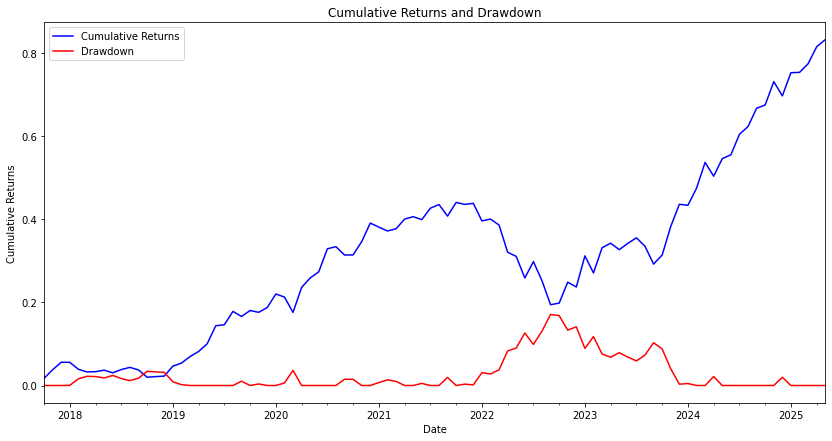

In [20]:
# Plot portfolio performance
fig, ax = plt.subplots(figsize=(14, 7))
(cumulative_returns - 1).plot(ax=ax, label='Cumulative Returns', color='blue')
drawdown.plot(ax=ax, label='Drawdown', color='red')
ax.set_title('Cumulative Returns and Drawdown')
ax.set_ylabel('Cumulative Returns')
ax.set_xlabel('Date')
ax.legend()
plt.show()

Below illustration using `fill_between` plot highlights the drawdowns.

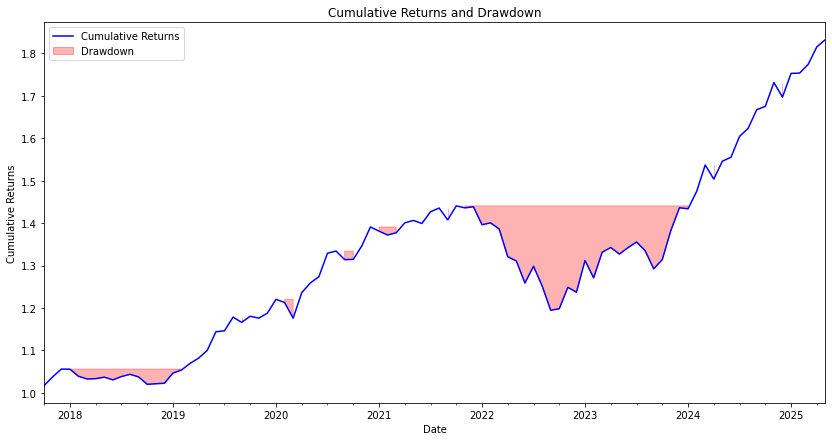

In [21]:
fig, ax = plt.subplots(figsize=(14, 7))
(cumulative_returns).plot(ax=ax, label='Cumulative Returns', color='blue')
plt.fill_between(
    risk_parity_portfolio_returns.index,
    cumulative_returns,
    running_max,
    where= cumulative_returns < running_max,
    color='red',
    alpha=0.3,
    label="Drawdown"
)
#drawdown.plot(ax=ax, label='Drawdown', color='red')
ax.set_title('Cumulative Returns and Drawdown')
ax.set_ylabel('Cumulative Returns')
ax.set_xlabel('Date')
ax.legend()
plt.show()

Fin.